## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection, preprocessing, metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_0 = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train_0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train = train_0.drop('label', axis = 1)
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# model PCA 

Text(0, 0.5, 'Explained variance')

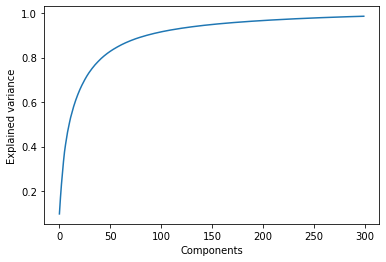

In [5]:
pca_1 = PCA(300)
pca_full = pca_1.fit(train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Сomponents')
plt.ylabel('Explained variance')

In [75]:
pca = PCA(n_components = 50)
train_PCA = pd.DataFrame(pca.fit_transform(train.drop(train.std()[train.std() == 0.0].index.values, axis = 1)),  
                         columns = ["PCA "+str(i) for i in range(1,51)])
train_PCA.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,...,PCA 41,PCA 42,PCA 43,PCA 44,PCA 45,PCA 46,PCA 47,PCA 48,PCA 49,PCA 50
0,-661.595780,-699.311328,183.282040,120.611394,-81.081811,489.461886,-683.470838,85.559388,348.548050,202.978538,...,106.246271,20.358411,41.484314,-35.046996,-204.119164,32.113196,-62.575026,-60.051043,-72.786968,65.234038
1,1701.451685,-360.551556,-501.805594,335.423656,-442.378933,738.404049,653.875438,-176.600675,-7.520180,67.846274,...,13.357524,2.635841,7.417590,-48.897729,-112.964409,-43.207467,-44.268089,-137.361010,118.130917,1.975930
2,-886.894434,-293.765782,67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377740,-195.295504,-25.626015,...,161.236748,29.954994,78.068247,110.377847,33.350769,135.533125,5.026946,-10.741445,-71.651746,-42.837803
3,-165.755602,300.182761,-64.145485,759.706261,-425.844379,157.390337,-304.099142,276.408979,-45.867208,-295.477565,...,-62.255148,143.448330,54.554233,148.622542,212.405224,254.902567,201.657595,103.422511,-54.523114,34.567364
4,1923.709716,-449.153069,-548.613023,188.555147,-651.736273,990.063824,564.507044,-255.915217,124.914689,177.566840,...,123.114020,-83.250431,50.706941,-48.356558,-109.119761,51.617117,23.778088,-23.948285,1.586254,124.730685


In [76]:
train_PCA['Label'] = train_0['label']
train_PCA['Label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [77]:
test_pca = pd.DataFrame(pca.fit_transform(test.drop(test.std()[test.std() == 0.0].index.values, axis = 1)),  
                        columns = ["PCA "+str(i) for i in range(1,51)])
test_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,...,PCA 41,PCA 42,PCA 43,PCA 44,PCA 45,PCA 46,PCA 47,PCA 48,PCA 49,PCA 50
0,842.929585,144.673505,743.120839,672.576463,386.203909,489.514097,205.567932,84.884760,-314.762737,-337.060866,...,-36.347993,-74.805877,-266.567342,122.548766,103.340763,-79.696086,-246.091179,22.210184,-120.355890,42.415579
1,1142.704681,72.916156,252.570924,-63.403051,-935.429941,446.612824,735.088271,-243.589035,431.951740,-489.143069,...,16.522984,-111.263380,86.069798,-27.678377,59.198246,-206.302123,-160.535042,-178.574475,100.776314,16.034398
2,-498.188691,-134.483438,173.832594,-77.578581,-169.244286,135.482181,-329.223276,-342.832830,-283.127288,414.895279,...,148.628937,-211.253833,26.935172,113.259997,43.030919,36.567864,122.319509,-53.062456,-50.344380,74.854210
3,-234.078452,-611.345537,475.776747,426.097326,-201.603505,159.147356,-78.190273,121.051270,-104.354971,193.620329,...,31.968500,66.918320,105.914681,76.525416,-92.054283,-54.120871,-137.780552,-85.562771,-49.063175,144.547863
4,-122.664936,708.878598,2.083640,153.177373,291.845879,46.305894,68.935099,739.863255,-306.893576,27.604607,...,-87.606202,163.530769,-22.477077,107.672875,-35.482282,217.019064,-70.715685,111.179641,-2.625737,-202.452956


In [124]:
# kNN Classifier

In [78]:
X_KNN = train_PCA.iloc[:, 0:-1].values
y_KNN = train_PCA.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X_KNN,y_KNN, test_size = 0.2, random_state = 42)

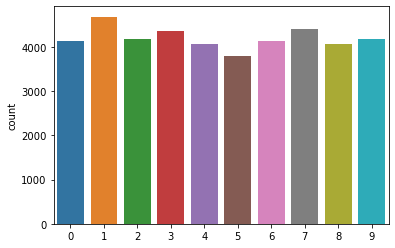

In [79]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
g = sns.countplot(y_KNN)

In [80]:
table = np.arange(1,13,2)
df = pd.DataFrame(table, columns = ["Neighbors"])
Train_accuracy = []
Val_accuracy = []
for k in table:
    KNN = KNeighborsClassifier(n_neighbors = k)
    test_knn = KNN.fit(X_train, y_train)
    val_pred = test_knn.predict(X_val)
    train_pred = test_knn.predict(X_train)
    Val_accuracy.append(metrics.accuracy_score(y_val, val_pred))
    Train_accuracy.append(metrics.accuracy_score(y_train, train_pred))
df['Train_accuracy'] = Train_accuracy
df['Val_accuracy'] = Val_accuracy
df

,Neighbors,Train_accuracy,Val_accuracy
0,1,1.000000,0.972381
1,3,0.986399,0.973810
2,5,0.982500,0.972381
3,7,0.980149,0.971667
4,9,0.977887,0.968452
5,11,0.975774,0.967500


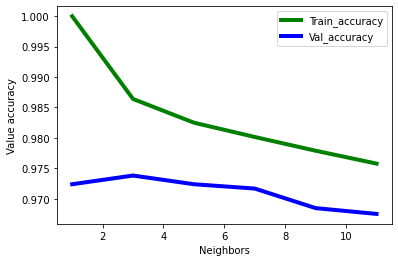

In [81]:
plt.plot('Neighbors', 'Train_accuracy', data = df, marker = '', color = 'g', linewidth = 4)
plt.plot('Neighbors', 'Val_accuracy', data = df, marker = '', color = 'b', linewidth = 4)
plt.xlabel('Neighbors')
plt.ylabel('Value accuracy')
plt.legend(loc = 'best')

In [82]:
print('Best params PCA & kNN Classifier')
df[df['Val_accuracy'] == df['Val_accuracy'].max()].iloc[[0]]

Best params PCA & kNN Classifier


,Neighbors,Train_accuracy,Val_accuracy
1,3,0.986399,0.97381


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.99      0.96      0.97       846
           3       0.97      0.95      0.96       937
           4       0.99      0.96      0.97       839
           5       0.96      0.96      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.97      0.95      0.96       835
           9       0.93      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [84]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, val_pred))

[[812   0   0   0   0   0   4   0   0   0]
 [  0 906   0   0   0   0   2   0   0   1]
 [  4   8 809   2   1   1   1  13   6   1]
 [  2   4   3 893   1   8   0   8  11   7]
 [  1   4   0   0 802   0   5   2   0  25]
 [  0   2   0   5   0 677   9   1   4   4]
 [  5   1   0   0   0   4 774   0   1   0]
 [  0  17   2   0   1   0   0 859   0  14]
 [  1   7   3   9   1  13   2   1 792   6]
 [  3   2   3   9   4   0   0  14   0 803]]


In [93]:
KNN = KNeighborsClassifier(n_neighbors = 10)
test_fit = KNN.fit(X_train, y_train)
test_pred = test_fit.predict(test_pca)

In [90]:
table_test = np.arange(1,28001)
rez = pd.DataFrame(table_test, columns = ["ImageId"])
rez['Label'] = pd.DataFrame(test_pred)
rez.head(12)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,4
5,6,2
6,7,0
7,8,9
8,9,0
9,10,4


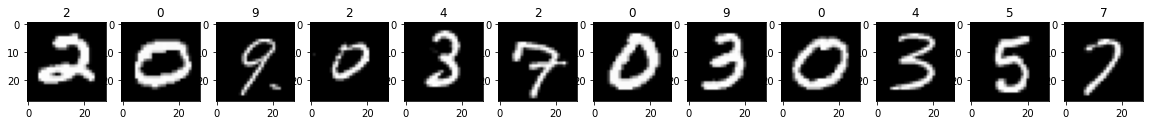

In [91]:
# my predict

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:12], 1):
    subplot = fig.add_subplot(1, 12, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % test_pred[i - 1]);

In [344]:
rez.to_csv("CVML_Digit_Recognizer_PCA&kNN.csv",index = False)

In [92]:
# for send
with open('submit_11.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(test_pred, 1):
        dst.write('%s,%s\n' % (i, p))

In [346]:
# !head submit.txt

In [25]:
from IPython.display import Image

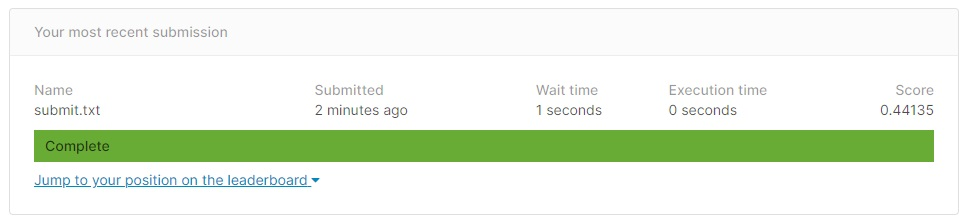

In [352]:
Image('Digit_Recognizer_Kaggle.jpg')

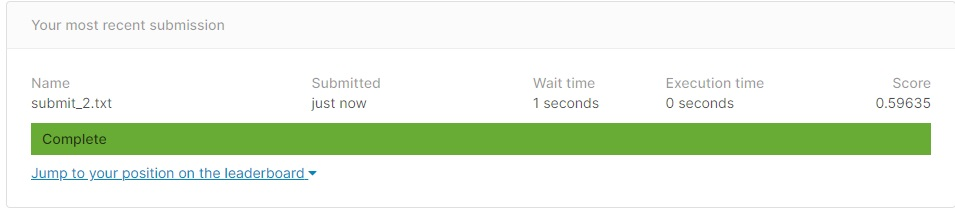

In [50]:
# sample 3
Image('Digit_Recognizer_Kaggle_0596.jpg')